In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.feature_selection import RFE

In [11]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [12]:
from sklearn.svm import LinearSVC

In [13]:
from sklearn.feature_selection import SelectFromModel

In [14]:
from sklearn import metrics

In [15]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
import math

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
from sklearn.metrics import r2_score

In [20]:
from sklearn.feature_selection import RFECV

In [21]:
from sklearn.model_selection import RepeatedKFold

In [22]:
from numpy import mean
from numpy import std
from numpy import amin
from numpy import amax

In [23]:
df = pd.read_csv('../../data/extracted_features_round4_training.csv', header=0)

In [24]:
df = df.drop(columns='Unnamed: 0')

In [25]:
#df = df[['CV', 'TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TABSSIMBERT', 'AKWPWMEAN',
#       'TAWSSIMPSPACY', 'TKWAORATIO', 'TAKWSIMSPACY', 'TMIKWP', 'TABSSIMSPACY',
#       'TAFSSIMSPACY', 'TAMIKWWSSIMSPACY', 'TKWAOWRATIO', 'TAFSSD']]

In [26]:
scaler = StandardScaler()

In [27]:
X = df.drop(columns='CV')

In [28]:
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns,index = df.index)

In [29]:
labels = np.array(df['CV'])

In [30]:
df.columns

Index(['CV', 'TL', 'AL', 'TWC', 'AWC', 'TSC', 'ASC', 'TALRATIO', 'TAWCRATIO',
       'TASCRATIO', 'TP', 'AP', 'TAPD', 'TAPMEAN', 'TS', 'AS', 'TASD',
       'TASMEAN', 'TASCCRATIO', 'TASCCD', 'TKWC', 'AKWC', 'TAKWCRATIO',
       'AMIKWP', 'TMIKWS', 'AMIKWS', 'AFSP', 'TAFSPMEAN', 'TAFSPD', 'AFSS',
       'TAFSSMEAN', 'TAFSSD', 'TMIKWAORATIO', 'TKWAORATIO', 'TKWAOWRATIO',
       'TKWPMEAN', 'AKWPMEAN', 'TAKWPMEAN', 'TAKWPD', 'TKWPWMEAN', 'AKWPWMEAN',
       'TAKWPWMEAN', 'TAKWPWD', 'TAMIKWFP', 'TAMIKWDIST', 'TAKWDIST',
       'TASIMSPACY', 'TABSSIMSPACY', 'TAWSSIMSPACY', 'TAASSIMSPACY',
       'TAFSSIMSPACY', 'TABSSIMPSPACY', 'TAWSSIMPSPACY', 'TAGSSIMRATIOSPACY',
       'TVC', 'AVC', 'TAVCD', 'TNC', 'ANC', 'TANCD', 'TABSSIMBERT',
       'TAWSSIMBERT', 'TAASSIMSBERT', 'TAFSSIMBERT', 'TABSSIMPBERT',
       'TAWSSIMPBERT', 'TAGSSIMRATIOBERT', 'TAMIKWASSIMSPACY',
       'TAMIKWBSSIMSPACY', 'TAMIKWWSSIMSPACY', 'TMIKWP', 'TAMKWSSIMSPACY',
       'TAMKWSP', 'TAMKWSPD', 'TAMKWSS', 'TAMKWSSD', 'TA

In [31]:
feature_list = list(X.columns)

In [32]:
features = np.array(X)

In [32]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [33]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (725, 99)
Training Labels Shape: (725,)
Testing Features Shape: (242, 99)
Testing Labels Shape: (242,)


In [33]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [35]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [36]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'score points.')

Mean Absolute Error: 0.53 score points.


In [37]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
r2 = r2_score(predictions, test_labels)
print('Accuracy:', round(accuracy, 2), '%.')
print('R2 score:', r2)

Accuracy: 83.28 %.
R2 score: -22.367085016960704


<BarContainer object of 99 artists>

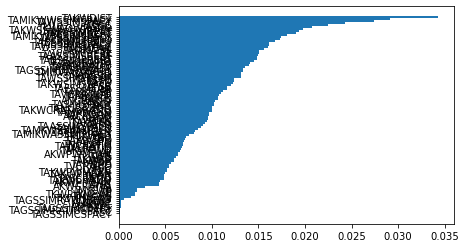

In [38]:
feature_names = [f'{i}' for i in X.columns]  
f_i = list(zip(feature_names,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

In [39]:
default_random_forest_regressor = RandomForestRegressor()
rfe = RFECV(rf,cv=5,scoring="mean_absolute_error")

rfe.fit(X,y)

RFECV(cv=5, estimator=RandomForestRegressor(n_estimators=1000, random_state=42),
      scoring='neg_mean_squared_error')

In [53]:
default_random_forest_regressor = RandomForestRegressor()
rfe_new = RFECV(default_random_forest_regressor,cv=cv,scoring="neg_mean_absolute_error")

rfe_new.fit(X,labels)

RFECV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
      estimator=RandomForestRegressor(), scoring='neg_mean_absolute_error')

In [54]:
selected_features = np.array(feature_list)[rfe_new.get_support()]

In [55]:
selected_features.shape

(35,)

In [62]:
selected_features

array(['TL', 'TAWCRATIO', 'AS', 'TASMEAN', 'TASCCRATIO', 'TKWAOWRATIO',
       'TAMIKWFP', 'TAMIKWDIST', 'TAKWDIST', 'TABSSIMSPACY',
       'TAWSSIMSPACY', 'TAFSSIMSPACY', 'TABSSIMPSPACY', 'TAWSSIMPSPACY',
       'TANCD', 'TABSSIMBERT', 'TAWSSIMBERT', 'TAASSIMSBERT',
       'TAFSSIMBERT', 'TABSSIMPBERT', 'TAMIKWWSSIMSPACY', 'TAMKWSP',
       'TAMKWSPD', 'TAMKWSS', 'TAKWSPD', 'TAKWSS', 'TAKWSSD', 'TSCC',
       'ASCC', 'TKWCRATIO', 'TKWAOW', 'AVCRATIO', 'TAVCRATIOD',
       'ANCRATIO', 'TAKWSSIMVARSPACY'], dtype='<U17')

In [34]:
X_selected = X[['TL', 'TAWCRATIO', 'AS', 'TASMEAN', 'TASCCRATIO', 'TKWAOWRATIO',
       'TAMIKWFP', 'TAMIKWDIST', 'TAKWDIST', 'TABSSIMSPACY',
       'TAWSSIMSPACY', 'TAFSSIMSPACY', 'TABSSIMPSPACY', 'TAWSSIMPSPACY',
       'TANCD', 'TABSSIMBERT', 'TAWSSIMBERT', 'TAASSIMSBERT',
       'TAFSSIMBERT', 'TABSSIMPBERT', 'TAMIKWWSSIMSPACY', 'TAMKWSP',
       'TAMKWSPD', 'TAMKWSS', 'TAKWSPD', 'TAKWSS', 'TAKWSSD', 'TSCC',
       'ASCC', 'TKWCRATIO', 'TKWAOW', 'AVCRATIO', 'TAVCRATIOD',
       'ANCRATIO', 'TAKWSSIMVARSPACY']]

In [35]:
X

,TL,AL,TWC,AWC,TSC,ASC,TALRATIO,TAWCRATIO,TASCRATIO,TP,...,TKWAOW,TVCRATIO,AVCRATIO,TAVCRATIOD,TNCRATIO,ANCRATIO,TANCRATIOD,TAGSSIMCSPACY,TAGSSIMCBERT,TAKWSSIMVARSPACY
0,0.212485,-0.535143,0.526791,-0.443101,-0.150981,-0.255190,-0.166738,-0.183863,-0.392040,0.739379,...,-0.306065,0.544406,2.108058,0.170174,-0.971470,-1.008737,0.723823,-0.198257,-0.272947,0.153046
1,-0.020676,0.297460,-0.147474,0.239207,-0.150981,-0.109029,-0.389515,-0.366033,-0.427230,-0.196395,...,0.646310,2.104187,1.268332,-1.714792,1.094020,-0.938875,-1.421384,-0.198257,-0.272947,-0.423083
2,-1.011607,-0.854884,-0.821738,-0.836076,-0.150981,-0.693673,0.032131,0.022103,-0.105491,-0.196395,...,-0.785455,-0.016300,1.586900,0.563943,-1.525626,-1.328998,1.211266,-0.198257,-0.272947,2.057408
3,0.503935,-0.065113,1.875320,-0.009101,-0.150981,0.037132,-0.314702,-0.244910,-0.452823,-0.196395,...,1.501908,0.165929,1.337393,0.291508,-0.625123,-1.857309,0.112742,-0.198257,-0.272947,0.076737
4,0.154194,-0.838352,0.526791,-0.816643,-0.150981,-0.791114,0.222779,0.225584,0.098276,-0.196395,...,-0.562901,-0.380759,0.206472,0.460652,-0.925291,-0.316733,0.877600,-0.198257,-0.272947,1.803638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,-0.720157,1.665094,-0.484606,1.625415,-0.150981,2.083388,-0.471610,-0.436092,-0.559193,-0.196395,...,0.382221,-0.281361,0.786650,0.559071,1.094020,-0.022363,-1.153589,-0.198257,-0.272947,-0.473307
963,1.786317,0.087055,0.526791,0.081585,-0.150981,0.183293,-0.285459,-0.320796,-0.472273,0.271492,...,0.007932,-0.599434,-0.389640,0.478737,0.875716,-0.355011,-1.021899,-0.198257,-0.272947,-0.249337
964,-1.885959,2.184344,-1.833135,2.167375,-0.150981,2.473151,-0.499362,-0.465849,-0.565384,-0.196395,...,-0.985792,-1.474135,-1.070417,1.138618,-1.525626,1.876030,2.147740,-0.198257,-0.272947,-0.432772
965,1.028546,2.635964,-0.147474,2.577623,-0.150981,2.375710,-0.461899,-0.445894,-0.563969,-0.196395,...,0.849829,-1.474135,1.122650,1.894936,0.275381,0.506896,-0.140621,-0.198257,-0.272947,-0.451826


In [36]:
features_selected = np.array(X_selected)

In [37]:
train_features, test_features, train_labels, test_labels = train_test_split(features_selected, labels, test_size = 0.25, random_state = 42)

In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [39]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = cv, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_selected, labels);

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


In [40]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [41]:

base_model = RandomForestRegressor(random_state = 42)
base_model.fit(X_selected, labels)
base_mae = mean(cross_val_score(base_model, X_selected, labels, scoring='neg_mean_absolute_error', cv=cv))
print('MAE: {}.'.format(base_mae))

MAE: -0.547288391323024.


In [42]:

best_random = rf_random.best_estimator_
random_mae = mean(cross_val_score(best_random, X_selected, labels, scoring='neg_mean_absolute_error', cv=cv))
print('MAE: {}.'.format(random_mae))

MAE: -0.5419207383460066.


In [43]:

print('MAE decrease of {:0.2f}%.'.format( -100 * (random_mae - base_mae) / base_mae))

MAE decrease of 0.98%.


In [72]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60, 70, 80],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 600, 700, 800]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='neg_mean_absolute_error',
                          cv = cv, n_jobs = -1, verbose = 2, return_train_score=True)

In [73]:
# Fit the grid search to the data
grid_search.fit(X_selected, labels);

Fitting 30 folds for each of 144 candidates, totalling 4320 fits


In [74]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 600}

In [75]:
best_grid = grid_search.best_estimator_
grid_mae = mean(cross_val_score(best_grid, X_selected, labels, scoring='neg_mean_absolute_error', cv=cv))
print('MAE: {}.'.format(random_mae))

MAE: -0.5419207383460066.


In [76]:
print('MAE decrease of {:0.2f}%.'.format( -100 * (grid_mae - base_mae) / base_mae))

MAE decrease of 1.01%.


In [77]:
rf_final = RandomForestRegressor(n_estimators = 600, min_samples_split = 10, min_samples_leaf = 3, max_features = 'sqrt', max_depth = 50, bootstrap = True)

In [78]:
r2 = cross_val_score(rf_final, X_selected, labels, scoring='r2', cv=cv)
r2

array([ 0.00806648, -0.0225572 ,  0.07541703, -0.02284314,  0.03782331,
        0.05142126,  0.0320865 , -0.0285375 ,  0.01021382, -0.04128986,
       -0.02391118, -0.03090851,  0.04336929,  0.00805803,  0.0172369 ,
        0.0044872 ,  0.01216432, -0.02736187,  0.01843896, -0.02027808,
        0.02004502,  0.02269716, -0.02896247,  0.05169583,  0.00105887,
       -0.02849939, -0.06042984, -0.03027435,  0.02603405,  0.00982721])

In [79]:
print("Mean: %f" % mean(r2))
print("SD: %f" % std(r2))
print("Max: %f" % amax(r2))
print("Min: %f" % amin(r2))

Mean: 0.002810
SD: 0.031779
Max: 0.075417
Min: -0.060430


In [80]:
mae = cross_val_score(rf_final, X_selected, labels, scoring='neg_mean_absolute_error', cv=cv)
mae

array([-0.51854555, -0.55573252, -0.47799269, -0.60799892, -0.54864058,
       -0.57541488, -0.51355836, -0.53190502, -0.52999065, -0.53848459,
       -0.59534091, -0.61324451, -0.52599223, -0.51304908, -0.56282146,
       -0.56669959, -0.51263553, -0.52852046, -0.50446146, -0.51834845,
       -0.57216628, -0.55523582, -0.64228563, -0.45337165, -0.60645701,
       -0.56191363, -0.46822286, -0.53991898, -0.51872456, -0.52631938])

In [81]:
print("Mean: %f" % mean(mae))
print("SD: %f" % std(mae))
print("Max: %f" % amax(mae))
print("Min: %f" % amin(mae))

Mean: -0.542800
SD: 0.042527
Max: -0.453372
Min: -0.642286


In [82]:
rmse = cross_val_score(rf_final, X_selected, labels, scoring='neg_root_mean_squared_error', cv=cv)
rmse

array([-0.6774407 , -0.69140683, -0.603399  , -0.73513934, -0.67122055,
       -0.68051619, -0.65638375, -0.64598869, -0.64514784, -0.65437344,
       -0.75603922, -0.74161034, -0.64542582, -0.64447962, -0.7059057 ,
       -0.68878046, -0.64410882, -0.64726608, -0.61716803, -0.61358207,
       -0.7047387 , -0.68434921, -0.76879218, -0.57643233, -0.7369089 ,
       -0.71013761, -0.56614052, -0.65741048, -0.65129305, -0.62116164])

In [83]:
print("Mean: %f" % mean(rmse))
print("SD: %f" % std(rmse))
print("Max: %f" % amax(rmse))
print("Min: %f" % amin(rmse))

Mean: -0.668092
SD: 0.049364
Max: -0.566141
Min: -0.768792


In [84]:
feature_importances = []

In [85]:
feature_list_selected = list(X_selected.columns)

In [86]:
for i in range(len(feature_list_selected)):
    feature_importances.append([])

In [87]:
for train_index , test_index in cv.split(X_selected):
    X_train , X_test = X_selected.iloc[train_index,:],X_selected.iloc[test_index,:]
    y_train , y_test = labels[train_index] , labels[test_index]
     
    rf_final.fit(X_train,y_train)
    pred_values = rf_final.predict(X_test)
    
    importances = list(rf_final.feature_importances_)
     
    for i in range(len(importances)):
        feature_importances[i].append(importances[i])

In [88]:
mean_feature_importances = []
for importances in feature_importances:
    mean_feature_importances.append(mean(importances))

In [89]:
# List of tuples with variable and importance
feature_importances_tuples = [(feature, round(importance, 5)) for feature, importance in zip(feature_list_selected, mean_feature_importances)]
# Sort the feature importances by most important first
feature_importances_tuples = sorted(feature_importances_tuples, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_tuples];

Variable: TAWSSIMSPACY         Importance: 0.03883
Variable: TAKWDIST             Importance: 0.03714
Variable: TAFSSIMSPACY         Importance: 0.03276
Variable: TAFSSIMBERT          Importance: 0.03218
Variable: TKWAOWRATIO          Importance: 0.03189
Variable: TABSSIMBERT          Importance: 0.03158
Variable: TABSSIMSPACY         Importance: 0.03081
Variable: TSCC                 Importance: 0.03035
Variable: TASCCRATIO           Importance: 0.03029
Variable: TAMIKWWSSIMSPACY     Importance: 0.03003
Variable: ASCC                 Importance: 0.03003
Variable: TAKWSSIMVARSPACY     Importance: 0.02998
Variable: TASMEAN              Importance: 0.02975
Variable: TANCD                Importance: 0.02936
Variable: TAVCRATIOD           Importance: 0.02934
Variable: TAKWSSD              Importance: 0.02921
Variable: TAASSIMSBERT         Importance: 0.02862
Variable: AS                   Importance: 0.02848
Variable: TAMKWSS              Importance: 0.02786
Variable: ANCRATIO             

In [90]:
f = [feature for feature, importance in feature_importances_tuples]
imp = [importance for feature, importance in feature_importances_tuples]

In [91]:
imp_coef = pd.Series(imp, index = f)
imp_coef = imp_coef.iloc[::-1]

In [104]:
imp_coef

TABSSIMPBERT        0.02249
TAMIKWDIST          0.02367
TKWCRATIO           0.02417
TAMKWSP             0.02478
TAKWSPD             0.02515
TAWSSIMBERT         0.02528
TAMKWSPD            0.02551
TAMIKWFP            0.02597
TAWSSIMPSPACY       0.02599
TL                  0.02617
TAWCRATIO           0.02655
TKWAOW              0.02657
AVCRATIO            0.02696
TABSSIMPSPACY       0.02717
TAKWSS              0.02732
ANCRATIO            0.02776
TAMKWSS             0.02786
AS                  0.02848
TAASSIMSBERT        0.02862
TAKWSSD             0.02921
TAVCRATIOD          0.02934
TANCD               0.02936
TASMEAN             0.02975
TAKWSSIMVARSPACY    0.02998
ASCC                0.03003
TAMIKWWSSIMSPACY    0.03003
TASCCRATIO          0.03029
TSCC                0.03035
TABSSIMSPACY        0.03081
TABSSIMBERT         0.03158
TKWAOWRATIO         0.03189
TAFSSIMBERT         0.03218
TAFSSIMSPACY        0.03276
TAKWDIST            0.03714
TAWSSIMSPACY        0.03883
dtype: float64

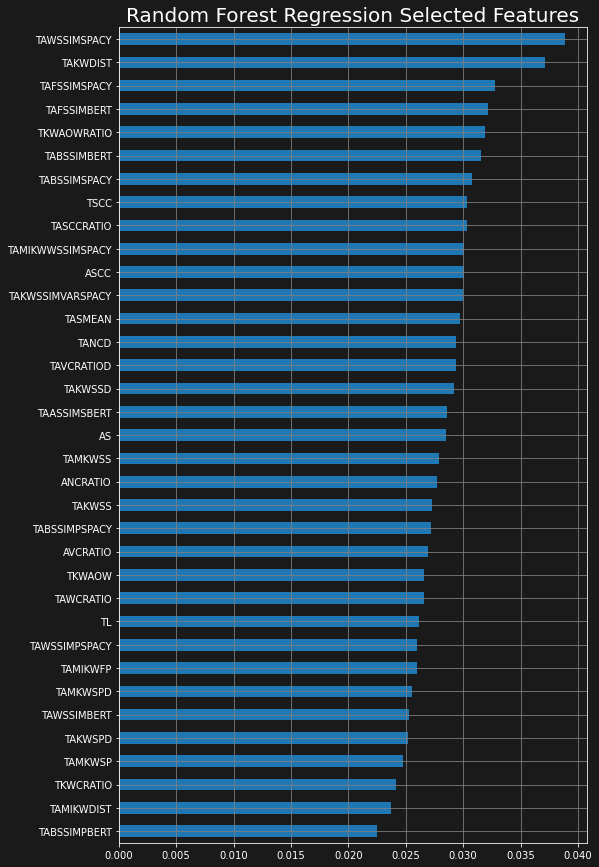

In [93]:
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)
ax = imp_coef.plot(kind = "barh")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
fig = ax.get_figure()
ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Random Forest Regression Selected Features",
          fontsize=20,
          color="white")
plt.grid(c='gray')
fig.savefig('../../images/rf_regression_features.png', transparent=False)

In [94]:
train_features, test_features, train_labels, test_labels = train_test_split(features_selected, labels, test_size = 0.25, random_state = 42)

In [95]:
rf_final.fit(train_features, train_labels)

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=10, n_estimators=600)

In [96]:
predictions = rf_final.predict(test_features)

In [97]:
test_labels

array([2.5, 3.5, 3.5, 4. , 2.5, 3.5, 4. , 3.5, 2.5, 3.5, 3.5, 3.5, 3.5,
       4. , 2. , 4.5, 4. , 4.5, 3. , 3. , 4. , 3.5, 4. , 4. , 4. , 4.5,
       3.5, 2.5, 4. , 4. , 4. , 3. , 3.5, 4. , 3.5, 4. , 3.5, 4. , 3.5,
       3.5, 3.5, 4. , 3.5, 4. , 3.5, 3.5, 4.5, 4. , 3. , 2.5, 4. , 4. ,
       4.5, 3.5, 4.5, 4. , 2. , 4.5, 3.5, 3. , 4. , 4. , 3. , 4.5, 4. ,
       4. , 5. , 1.5, 4.5, 3.5, 4.5, 3.5, 2.5, 2. , 4.5, 3.5, 4. , 4.5,
       3. , 4.5, 4.5, 4. , 3. , 2. , 3.5, 4. , 4. , 3.5, 3. , 4. , 3.5,
       3.5, 3. , 3.5, 3. , 3. , 3.5, 4. , 2.5, 4. , 4. , 4. , 4. , 4. ,
       3.5, 3.5, 4.5, 3.5, 3.5, 3. , 4. , 4. , 4. , 3.5, 3.5, 3.5, 1.5,
       4.5, 3. , 3. , 2.5, 4. , 4.5, 3. , 3.5, 4. , 3. , 4.5, 4. , 3.5,
       4. , 4. , 3. , 3. , 4.5, 4. , 4. , 2.5, 3. , 4. , 4.5, 3.5, 4. ,
       4. , 3. , 3. , 4. , 4.5, 5. , 5. , 3.5, 3. , 4. , 2. , 4. , 3.5,
       2.5, 3.5, 3.5, 2.5, 4. , 3. , 3.5, 3.5, 4. , 3. , 3.5, 4. , 3. ,
       3.5, 4.5, 2.5, 4. , 4. , 4. , 5. , 4. , 3. , 3.5, 4. , 4.

In [98]:
predictions

array([3.9667442 , 3.7383986 , 3.91975774, 3.96376741, 3.71890627,
       3.78537061, 3.6702205 , 3.86051403, 3.65647385, 3.83291355,
       3.47800079, 3.69406102, 3.70754592, 3.73319545, 3.62045482,
       3.87304713, 3.58084111, 3.74616016, 3.72626898, 3.72562273,
       3.83804929, 3.76534358, 3.7113087 , 3.9060388 , 3.67334163,
       3.74882785, 3.66502238, 3.89435102, 3.79056213, 3.69771336,
       3.75661954, 3.47643973, 3.76196438, 3.6186084 , 3.84064189,
       3.84007316, 3.58326924, 3.54942876, 3.6929215 , 3.65697922,
       3.75983722, 3.88383693, 3.63796645, 3.63631095, 3.60638806,
       3.72201666, 3.8681716 , 3.51103451, 3.88090358, 3.7424928 ,
       3.83987277, 3.88786776, 3.74034626, 3.67964591, 3.71026083,
       3.43961231, 3.67988544, 3.77587671, 3.64649565, 3.74959198,
       3.80629966, 3.7007606 , 3.75945508, 3.71232412, 3.69319245,
       3.70677857, 3.9611992 , 3.56546416, 3.80376334, 3.89650295,
       3.60897166, 3.61588102, 3.67827994, 3.64398505, 3.72196

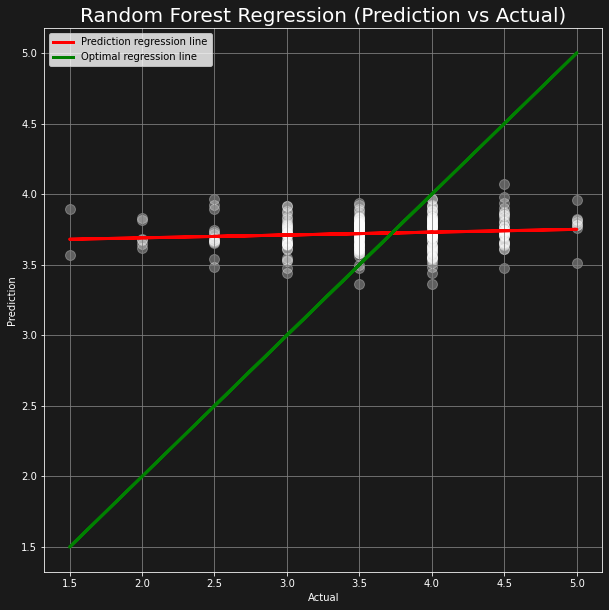

In [99]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(test_labels, predictions,  color='white', alpha=0.3, s=100)
m, b = np.polyfit(test_labels, predictions, 1)
ax.plot(test_labels, m*test_labels+b, color='red', linewidth=3, label="Prediction regression line")
ax.legend()
ax.plot(test_labels, test_labels, color='green', linewidth=3, label="Optimal regression line")
ax.legend()
plt.xlabel("Actual")
plt.ylabel("Prediction")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Random Forest Regression (Prediction vs Actual)",
          fontsize=20,
          color="white")
plt.grid(c='gray')
plt.savefig('../../images/random_forest_regression.png', transparent=False)